<font color=red>EXPLORATION OF DSSE TABLES</font>

The Purpose of this Analysis is to determine the most popular content in Data Science Stack Exchange (DSSE).




- After looking at the DSSE Database on Stack Exchange it looks like the DSSE Posts and Users tables will be useful for finding the most popular content.  

- Used the Stack Exchange Data Explorer (SEDE) to query the DSSE Database.

- The following SQL code was used:

    SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount,
    FavoriteCount
    FROM Posts
    WHERE CreationDate > '2018-12-31 23:59:59'
    ORDER BY CreationDate ASC
    
- This queries the columns in SELECT from Post with a CreationDate >= 2019.
- The query was downloaded as a csv

In [67]:
#read in the csv
import pandas as pd
df = pd.read_csv("2019_questions.csv", parse_dates = ["CreationDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19497 entries, 0 to 19496
Data columns (total 8 columns):
Id               19497 non-null int64
PostTypeId       19497 non-null int64
CreationDate     19497 non-null datetime64[ns]
Score            19497 non-null int64
ViewCount        10148 non-null float64
Tags             10148 non-null object
AnswerCount      10148 non-null float64
FavoriteCount    1605 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.2+ MB


In [61]:
#split the Tags on ><, replace the < and >. Check if worked
df["Tags"] = df["Tags"].str.replace("^<|>$", "").str.split("><")
df.head()

#NOTE: this made a list of the strings in each row of Tags.  The documentation didn't make it clear to me that would happen.

In [63]:
#drop rows where no Tags and check.
df_drop = df.dropna(subset = ["Tags"])
df_drop.head()

In [71]:

tag_count = {}

for tag_list in df_drop["Tags"]:
    for tag in tag_list:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

Count how many times each tag was used.
Count how many times each tag was viewed.
Create visualizations for the top tags of each of the above results.

In [112]:
# of times tag used
df_tagused = pd.DataFrame.from_dict(data = tag_count, orient = 'index').sort_values(by = [0], ascending = False)
df_u20 = df_tagused.iloc[0:20]

In [88]:
tag_view_count = {}
for index,tag_list in enumerate(df_drop["Tags"]):
    for tag in tag_list:
        if tag in tag_view_count:
            tag_view_count[tag] += df_drop['ViewCount'].iloc[index]
        else:
            tag_view_count[tag] = 1

In [89]:
df_tagviewed = pd.DataFrame.from_dict(data = tag_view_count, 
                                      orient = 'index').sort_values(by = [0], ascending = False)

In [107]:
df_tagviewed.rename(columns = { 0: 'Count'}, inplace = True)
df_tagviewed.head()
df_tv_plot = df_tagviewed.iloc[0:20]

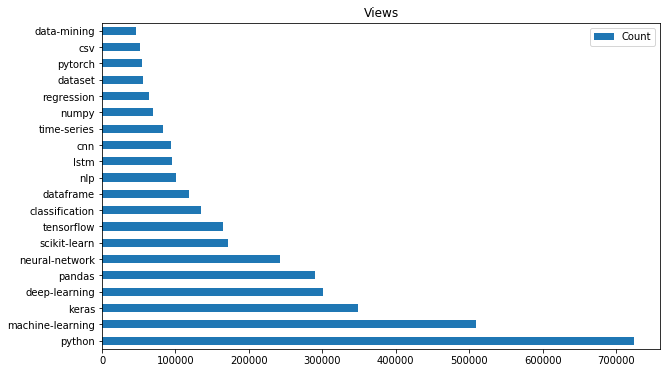

In [108]:
import matplotlib.pyplot as plt
df_tv_plot.plot(kind = 'barh', figsize = (10,6), title = "Views")


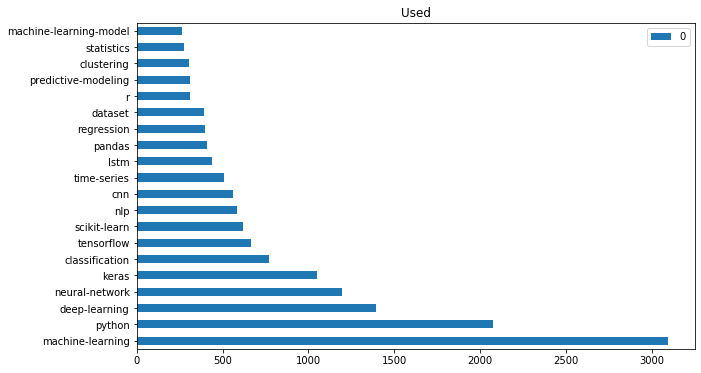

In [113]:
df_u20.plot(kind = 'barh', figsize = (10,6), title = "Used")

CONCLUSION:

